In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#read data from input csv file
house_data = pd.read_csv("../regressionDataSet/kc_house_data.csv")


In [46]:
#Determine the size of the data
print(house_data.shape)
#output
#(21613, 21)

#Determine the columns in the data
print(house_data.columns)



(21613, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [47]:
#View information about the data in each columns
print(house_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Feature Engineering
#### In the following code, following tasks to be performed:
#####  a. Selecting features to work on. Creating two new features - year and month from the date.
#####  b. Encoding the categorical features
#####  c. Normalizing the continuous numerical features

### 1. Selecting features
##### For this case, let us consider price as the target; and date, bedrooms, bathrooms, sqft_living, floors, waterfront, view, condition, grade, zipcode as input variables or predictors.

In [48]:
house_data_df = house_data[["price","date", "bedrooms", 
                                  "bathrooms", "sqft_living", "floors", 
                                  "waterfront", "view", "condition", "grade","zipcode"]]


In [49]:
house_data_df.head()

,price,date,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode
0,221900.0,20141013T000000,3,1.00,1180,1.0,0,0,3,7,98178
1,538000.0,20141209T000000,3,2.25,2570,2.0,0,0,3,7,98125
2,180000.0,20150225T000000,2,1.00,770,1.0,0,0,3,6,98028
3,604000.0,20141209T000000,4,3.00,1960,1.0,0,0,5,7,98136
4,510000.0,20150218T000000,3,2.00,1680,1.0,0,0,3,8,98074


#### Lets split date into year and month to consider that price could depend on year and month of sale due to market conditions



In [50]:
# Extracting year and month from date
house_data_df.loc[:,"year"] = house_data["date"].str[0:4]
house_data_df.loc[:,"month"] = house_data["date"].str[4:6]

#removing date after this extraction
house_data_df = house_data_df.drop(columns=["date"])
house_data_df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode,year,month
0,221900.0,3,1.00,1180,1.0,0,0,3,7,98178,2014,10
1,538000.0,3,2.25,2570,2.0,0,0,3,7,98125,2014,12
2,180000.0,2,1.00,770,1.0,0,0,3,6,98028,2015,02
3,604000.0,4,3.00,1960,1.0,0,0,5,7,98136,2014,12
4,510000.0,3,2.00,1680,1.0,0,0,3,8,98074,2015,02


#### Lets treat bedrooms, bathrooms, floors, waterfront, view, condition, grade, year and month as categorical features.


### 2. Encoding the categorical features

##### When using Pandas get_dummies() function to encode a categorical column, it is replaced by multiple columns, so that one for each of the values can be taken. For example, if the original 'view' column could take 4 values such as '1', '2', '3' and '4'. After encoding, the 'view' column gets replaced by 4 new columns - 'view_1', 'view_2', 'view_3' and 'view_4'. Each of these new columns take either a value 0 or 1. 

##### Let us encode the categorical columns - waterfront, view, condition, grade, year, month and zipcode.

In [51]:
# encoding categorical values
cat_features = ["waterfront", "view", "condition", "grade", "year", "month", "zipcode"]
house_data_df = pd.get_dummies(house_data_df,columns=cat_features)
print(house_data_df.columns)


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront_0', 'waterfront_1', 'view_0', 'view_1', 'view_2',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=113)


In [59]:
house_data_df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront_0,waterfront_1,view_0,view_1,view_2,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,1.0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,2.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,1.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,1.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,1.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Normalizing the continuous numerical features

##### The features with continuous numerical values are normalized so that, each of these features span across a common range of values, and hence would have equal influence on the model build.

##### Let us normalize the numerical variables - price, bedrooms, bathrooms, spft_living and floors.

##### Note: In the below code,  'StandardScaler' is used for normalizing the data. It works based on the standard deviation and mean value of the numerical columns.

In [52]:
from sklearn.preprocessing import StandardScaler

# finding the mean and std deviation of numerical columns
scaler = StandardScaler().fit(house_data_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']]) 

# scaling columns to a common range
house_data_normalized = scaler.transform(house_data_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']])# Scaled data 

#note that output is a 2-Dimensional array of normalized data
house_data_normalized


array([[-0.86671733, -0.39873715, -1.44746357, -0.97983502, -0.915427  ],
       [-0.00568792, -0.39873715,  0.1756067 ,  0.53363434,  0.93650577],
       [-0.98084935, -1.47395936, -1.44746357, -1.42625404, -0.915427  ],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, -1.15404732,  0.93650577],
       [-0.38158814, -0.39873715,  0.50022075, -0.52252773,  0.93650577],
       [-0.58588173, -1.47395936, -1.77207762, -1.15404732,  0.93650577]])

#### Replacing the numerical columns with normalized values

In [53]:
#updating the numerical(normalized) data into the dataframe
house_data_df_normalized=pd.DataFrame(house_data_normalized,columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors'])
house_data_df_normalized=house_data_df_normalized.join(house_data_df[house_data_df.columns.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors'])])


In [54]:
house_data_df_normalized.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront_0,waterfront_1,view_0,view_1,view_2,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.915427,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.005688,-0.398737,0.175607,0.533634,0.936506,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.915427,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.174090,0.676485,1.149449,-0.130550,-0.915427,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.915427,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Selecting features and target

In [55]:
Y = house_data_df_normalized['price']
X = house_data_df_normalized[house_data_df_normalized.columns.drop('price')]
print(X.shape)

(21613, 112)


### Splitting into train and test data
#### In the below code, we split the data into train and test set in a ratio of 80:20. 

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=100)
X_train.shape , X_test.shape
#output
#((17290, 112), (4323, 112))


((17290, 112), (4323, 112))

### Build a model and evaluate its performance using R-squared
#### The required model is built to predict the house price based on the selected predictors.

In [57]:
#importing required module to build the model
from sklearn.linear_model import LinearRegression

#building and training the model
model = LinearRegression()
model.fit(X_train,Y_train)

#Evaluating the model on the train and test data for R-Squared score 
train_score=model.score(X_train,Y_train)
test_score=model.score(X_test,Y_test)

print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared)',test_score)
# sample output
# Train Score (R-Squared):  0.8336987270194174
# Test Score (R-Squared) 0.8313082620280754


Train Score (R-Squared):  0.8336893826290159
Test Score (R-Squared) 0.831282624093431


##### In the above code, the model's performance is evaluated using the R2 measure which was discussed previously. Since both the train and test data provides comparable value for R-Squared measure, we can say that the model is not over-fitting.

 

### Evaluating the model performance using RMSE
#### Root Mean Squared Error (RMSE) measure can be used to give an estimate of the average error that can be expected from the model.
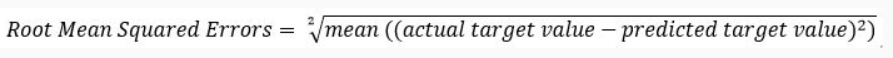

In [58]:
from sklearn.metrics import mean_squared_error

#root mean square error (RMSE) calculation for train data
train_predictions = model.predict(X_train)
train_RMSE=mean_squared_error(Y_train,train_predictions)**0.5

#root mean square error (RMSE) calculation for test data
test_predictions = model.predict(X_test)
test_RMSE=mean_squared_error(Y_test,test_predictions)**0.5

print('Train RMSE : ',train_RMSE)
print('Test RMSE : ',test_RMSE)
# output
# Train RMSE :  0.4078007927303328
# Test RMSE :  0.4107102720475509


Train RMSE :  0.4078122496368762
Test RMSE :  0.4107414809353975


#### RMSE values also confirm previous observation of the model is not overfitting.